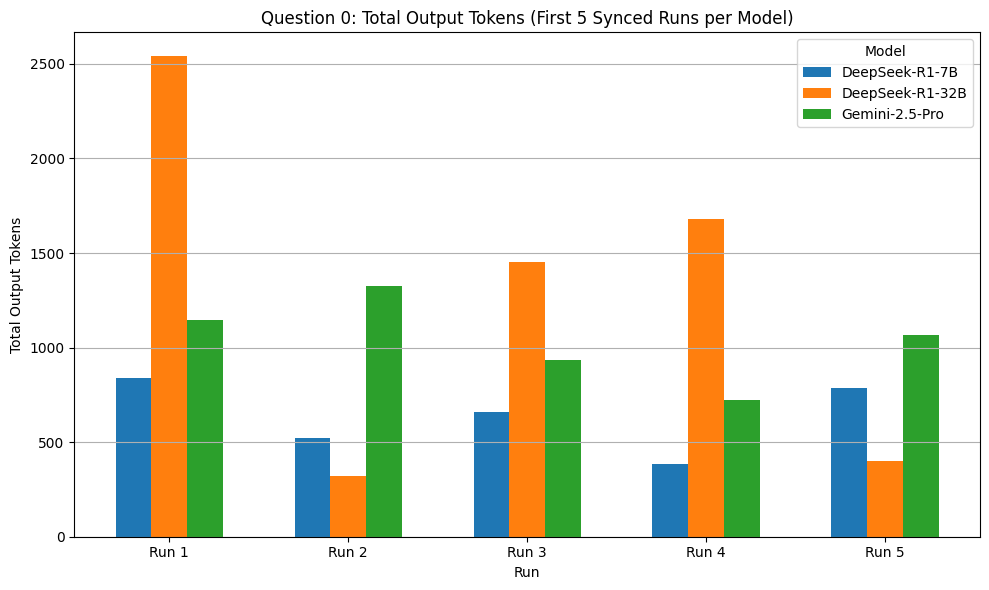

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

QUESTION_ID = 0

# === CONFIG ===
csv_paths = ["ds7_defense.csv", "ds32_defense.csv", "gemini_defense.csv"]  # Replace with your actual CSV file paths

# === 1. Load and concatenate all CSVs ===
df = pd.concat([pd.read_csv(path) for path in csv_paths], ignore_index=True)

# === 2. Filter for relevant subset ===
df = df[(df["question_id"] == 0) & (df["run_type"] == "attacked+defended")]

# === 3. Keep only first 5 runs per model ===
df = df.groupby("model").head(5).copy()
df["run_number"] = df.groupby("model").cumcount()

# === 4. Prepare plot ===
plt.figure(figsize=(10, 6))
bar_width = 0.2
models = df["model"].unique()
n_models = len(models)
x = list(range(5))  # Shared run indices: Run 0 to Run 4

# ——— Remap long model names to shorter display names ———
name_map = {
    'deepseek-ai_DeepSeek-R1-Distill-Qwen-7B': 'DeepSeek-R1-7B',
    'deepseek-ai_DeepSeek-R1-Distill-Qwen-32B':   'DeepSeek-R1-32B',
    'gemini': 'Gemini-2.5-Pro',
    # add your other raw→short mappings here
}

# === 5. Plot each model's 5 bars side by side ===
for i, model in enumerate(models):
    subset = df[df["model"] == model].sort_values("run_number")
    # Remap model names for display
    display_name = name_map.get(model, model)
    
    plt.bar(
        [r + i * bar_width for r in x],
        subset["total_output_tokens"],
        width=bar_width,
        label=display_name,
    )

# === 6. Customize axes and labels ===
midpoints = [r + bar_width * (n_models - 1) / 2 for r in x]
plt.xticks(midpoints, [f"Run {i+1}" for i in x])
plt.title("Question 0: Total Output Tokens (First 5 Synced Runs per Model)")
plt.xlabel("Run")
plt.ylabel("Total Output Tokens")
plt.legend(title="Model")
plt.grid(axis="y")
plt.tight_layout()
plt.show()


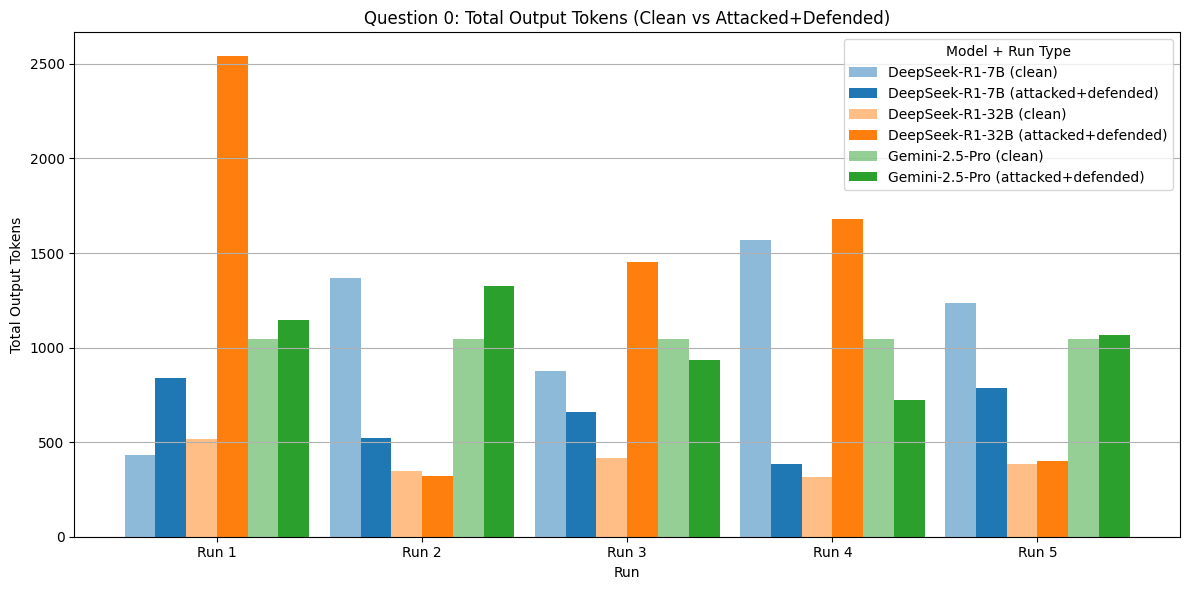

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# === CONFIG ===
csv_paths = ["ds7_defense.csv", "ds32_defense.csv", "gemini_defense.csv"]  # Replace with your actual CSV file paths

# === 1. Load and combine all CSVs ===
df = pd.concat([pd.read_csv(path) for path in csv_paths], ignore_index=True)

# === 2. Filter for question_id == QUESTION_ID and both clean & attacked+defended ===
df = df[(df["question_id"] == QUESTION_ID) & (df["run_type"].isin(["clean", "attacked+defended"]))]

# === 3. Keep only the first 5 runs per (model, run_type) pair ===
df = df.groupby(["model", "run_type"]).head(5).copy()
df["run_number"] = df.groupby(["model", "run_type"]).cumcount()

# === 4. Assign consistent color per model ===
models = df["model"].unique()
model_color_map = {model: plt.cm.tab10(i) for i, model in enumerate(models)}

# === 5. Plotting ===
plt.figure(figsize=(12, 6))
bar_width = 0.15
x = list(range(5))  # Shared run indices (Run 0 to Run 4)
# ——— Remap long model names to shorter display names ———
name_map = {
    'deepseek-ai_DeepSeek-R1-Distill-Qwen-7B': 'DeepSeek-R1-7B',
    'deepseek-ai_DeepSeek-R1-Distill-Qwen-32B':   'DeepSeek-R1-32B',
    'gemini': 'Gemini-2.5-Pro',
    # add your other raw→short mappings here
}


# Bar offset: for each model, plot clean then attacked+defended side by side
for j, model in enumerate(models):
    for i, run_type in enumerate(["clean", "attacked+defended"]):
        subset = df[(df["model"] == model) & (df["run_type"] == run_type)].sort_values("run_number")
        offset = j * 2 + i  # horizontal offset for positioning
        alpha = 0.5 if run_type == "clean" else 1.0  # clean is lighter
        model_name = name_map.get(model, model)
        plt.bar(
            [r + offset * bar_width for r in x],
            subset["total_output_tokens"],
            width=bar_width,
            label=f"{model_name} ({run_type})",
            color=model_color_map[model],
            alpha=alpha
        )

# === 6. Final plot adjustments ===
n_bars = len(models) * 2
midpoints = [r + (bar_width * (n_bars - 1)) / 2 for r in x]
plt.xticks(midpoints, [f"Run {i+1}" for i in x])

plt.title(f"Question {QUESTION_ID}: Total Output Tokens (Clean vs Attacked+Defended)")
plt.xlabel("Run")
plt.ylabel("Total Output Tokens")
plt.legend(title="Model + Run Type")
plt.grid(axis="y")
plt.tight_layout()

plt.savefig("output_tokens_comparison.pdf")

plt.show()
